Introduction: We were tasked with determining the best neighborhood in Pittsburgh according to some metric. After much deliberation, my group narrowed it down to best neighborhood by presumed wealth and what we eventually chose, the amount of traffic in a neighborhood. To determine this, my group chose three submetrics, the City of Pittsburgh traffic count, the number of city traffic signs, and number of speed humps. The submetric that I will be covering in this journal is the city of pittsburgh traffic count. For our approach, each member of the group will be taking a look at one of the three submetrics. To compile these submetrics together, we will be normalizing them by dividing each value by the max of the submetric. We will then assign them our arbitrarily chosen weights and add the metrics together. The min will be the best neighborhood in Pittsburgh according to the amount of traffic in a neighborhood. In this notebook, I will be determining the least traffic by the City of Pittsburgh traffic count.

The Metric: In this notebook I will be covering the submetric the least traffic by the City of Pittsburgh traffic count using the data set: City Of Pittsburgh Traffic Count.
Link: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

The Best Neighborhood:

In [1]:
# load pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#plt.xticks(rotation=90)

pd.set_option('display.max_columns', None)#This makes it easier to read the data since it allows me to see every single column

TC = pd.read_csv("City of Pittsburgh Traffic Count.csv")
TC.head()












,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,NaN,NaN,NaN,NaN,NaN,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Looking at a sample of the data with the head function. When I did this I noticed that there were a lot of NaN values so I wanted to make sure that I accounted for them when I manipulated my data.

In [2]:
TC["speed95_percent"]
SpeedDf = TC[~(TC["speed95_percent"].isnull()) & ~(TC["speed_limit"].isnull())]
SpeedDf

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,257117947,426,1.291196e+08,2021-06-15,2021-06-23,NaN,NaN,5,StatTrak,15.0,62.0,21.0,13.0,25.0,28.0,-79.895583,40.453386,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
408,464876196,427,3.257468e+08,2021-06-15,2021-06-23,NaN,NaN,4,StatTrak,15.0,57.0,21.0,17.0,26.0,29.0,-79.894000,40.452876,Homewood South,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
410,1140544457,429,1.023986e+09,2021-07-09,2021-07-19,910.0,NaN,2,StatTrak,25.0,51.0,23.0,29.0,28.0,30.0,-79.940428,40.461034,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23
411,742131013,430,1.933385e+09,2021-07-09,2021-07-19,271.0,NaN,3,StatTrak,25.0,39.0,20.0,10.0,25.0,27.0,-79.953005,40.465173,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6


Grabbed a sample of the data where both the speed95_percent and speed_limit columns are not null.

In [3]:
TrafficDf = TC[~(TC["average_daily_car_traffic"].isnull())]
TrafficDf

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
10,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,5216219,421,1.382452e+09,2021-06-29,2021-07-07,5605.0,NaN,7,StatTrak,25.0,75.0,29.0,77.0,33.0,36.0,-79.926715,40.425958,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15
404,1671608614,423,1.290716e+09,2021-06-15,2021-06-23,809.0,NaN,1,StatTrak,25.0,38.0,17.0,2.0,21.0,23.0,-80.010193,40.457801,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
410,1140544457,429,1.023986e+09,2021-07-09,2021-07-19,910.0,NaN,2,StatTrak,25.0,51.0,23.0,29.0,28.0,30.0,-79.940428,40.461034,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23
411,742131013,430,1.933385e+09,2021-07-09,2021-07-19,271.0,NaN,3,StatTrak,25.0,39.0,20.0,10.0,25.0,27.0,-79.953005,40.465173,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6


Grabbed all of the nonnull values of average_daily_car_traffic

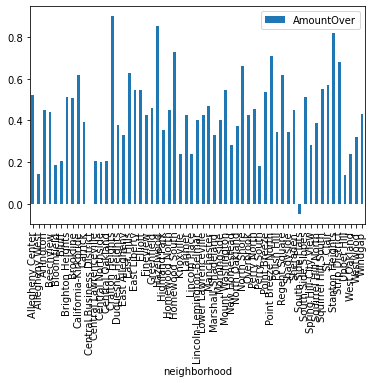

In [4]:
TC["AmountOver"] = (SpeedDf["speed95_percent"].sub(SpeedDf.speed_limit, axis=0)).divide(SpeedDf.speed_limit, axis=0)
SpeedDf2 = TC[~(TC["AmountOver"].isnull())][['neighborhood', 'AmountOver']].copy()
finalSpeedDf = SpeedDf2.groupby('neighborhood').mean()
macs = finalSpeedDf.max()
compiledSpeedDf = finalSpeedDf.divide(macs).mul(0.9)
#compiledSpeedDf
#compiledSpeedDf.plot().tick_params(labelrotation=90)
compiledSpeedDf.plot.bar()

,AmountOver
neighborhood,
Allegheny Center,0.521053
Allegheny West,0.142105
Arlington,0.450000
Beechview,0.442105
Bloomfield,0.187444
Bluff,0.205263
Brighton Heights,0.513158
Brookline,0.505263
California-Kirkbride,0.615789


Made a new column that is (speed95_percent-speed_limit)/speed_limit, this is the percentage over the speed limit that the car was travelling. I then coppied this to a new list where it was just this value and the neighborhood. I then joined all values where the neighborhood was the same and took the mean of those values. I got the max of this new dataframe, and divided every value by that normalizing the data to a number between 0 and 1. I then multiplied this normalized data by 0.9 which is the arbitrary weight I chose for amount over speed limit.

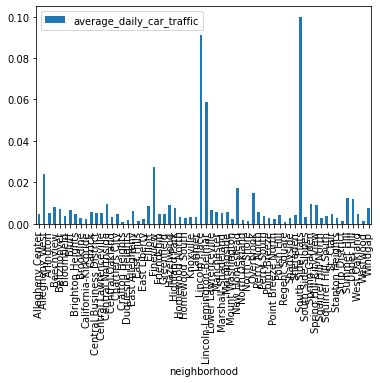

In [6]:
TrafficDf2 = TrafficDf[['neighborhood', 'average_daily_car_traffic']].copy()
TrafficDf2
finalTrafficDf = TrafficDf2.groupby('neighborhood').mean()
finalTrafficDf["average_daily_car_traffic"] = np.power(finalTrafficDf["average_daily_car_traffic"], -1)
macs = finalTrafficDf.max()
macs
compiledTrafficDf = finalTrafficDf.divide(macs).mul(0.1)
compiledTrafficDf[compiledTrafficDf.average_daily_car_traffic == compiledTrafficDf.average_daily_car_traffic.max()]
compiledTrafficDf.plot.bar()

I grouped the common neighborhood values together by mean. Then since the data is better if there is less average_dail_car_traffic, I inversed the data. I then normalized it to a value between 0 and 1 by dividing by the max. I then multiplied by the aribitrarily chosen weight of 0.1.

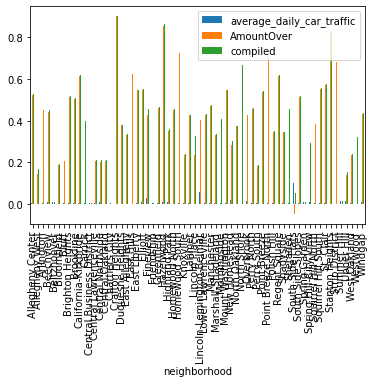

In [12]:
together = pd.concat([compiledTrafficDf, compiledSpeedDf])
finalTogether = together.groupby('neighborhood').sum()
finalTogether["compiled"] = np.add(finalTogether["average_daily_car_traffic"], finalTogether["AmountOver"])
finalTogether.compiled.sort_values()
finalTogether.plot.bar()

I compiled the data together, then grouped them by the neighborhood, they shared no values so the sum() did nothing. I then added the columns together in a new column called compiled. I then sorted the values to make my conclusion.

Conclusion:

Based on my submetric of City of Pittsburgh traffic count, the neighborhood in the City of Pittsburgh by Traffic Count is Crafton Heights.